----
## **<font color="crimson"> Ya está ok solo diseño</font>**

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [9]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm

### **<font color="Purple"> Datos de HadGEM3</font>**

##### **<font color="olive"> Temperatura </font>**

##### Climatología diaria

In [10]:
tas_file = 'datasetsok/anomalias_day_tasHG.nc'

In [11]:
tas_anom = xr.open_dataset(tas_file)
tas_anomday = tas_anom['tas']
tas_anomday['time'] = tas_anomday.time.dt.floor("D")

##### **<font color="olive"> Geopotencial </font>**

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [12]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual 

In [15]:
idxp_gph_file = 'datasetsok/zg500_idx_std+.nc'

In [16]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)

In [17]:
idxp_gph = idxp_gph_ds['zg500']

In [18]:
idxp_gph_vals = idxp_gph.mean(dim='time') #ya se puede mapear

In [19]:
idxp_gph_season =idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_season[0] #ya puedo mapear

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [20]:
# idxn_gph_file = 'datasets/zg5002_idx_n.nc'
idxn_gph_file = 'datasetsok/zg500_idx_std-.nc'

In [21]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)

In [22]:
idxn_gph = idxn_gph_ds['zg500']

In [23]:
idxn_gph_vals = idxn_gph.mean(dim='time') #ya se puede mapear

In [24]:
idxn_gph_season =idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_season[0] #ya puedo mapear

In [25]:
# idxp_gph_vals = idxp_gph_vals/g
# idxp_gph_djf = idxp_gph_djf/g
# idxn_gph_vals = idxn_gph_vals/g
# idxn_gph_djf = idxn_gph_djf/g

##### **<font color="olive"> Temperatura e índice >1 (con valores de gph) </font>**

In [27]:
# idxn_gph["time"] = idxp_gph.time.dt.floor("D") #para quitarle los nanosegundos y solo tener YYYY-MM-DD

In [28]:
missing_times = np.setdiff1d(idxp_gph.time.values, tas_anomday.time.values)
print(missing_times)
len(missing_times)

[]


0

In [29]:
tas_idxp=tas_anomday.sel(time=idxp_gph.time.values)

In [47]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
tas_idxp_vals = tas_idxp.mean(dim='time') #ANUAL
tas_idxp_season = tas_idxp.groupby(tas_idxp.time.dt.season).mean(dim='time') #DJF
tas_idxp_DJF = tas_idxp_season[0] #ya se puede mapear

In [31]:
# tas_idxp.to_netcdf('datasetsok/tasHG_idx_std2+.nc')

##### **<font color="olive"> Temperatura e índice <-1 (con valores de gph) </font>**

In [32]:
missing_times = np.setdiff1d(idxn_gph.time.values, tas_anomday.time.values)
print(missing_times)
len(missing_times)

[]


0

In [34]:
tas_idxn=tas_anomday.sel(time=idxn_gph.time.values)

In [36]:
tas_idxn

<xarray.DataArray 'tas' (time: 3578, lat: 36, lon: 37)> Size: 19MB
[4765896 values with dtype=float32]
Coordinates:
  * lon        (lon) float64 296B 227.8 229.7 231.6 233.4 ... 291.6 293.4 295.3
  * lat        (lat) float64 288B 5.625 6.875 8.125 9.375 ... 46.88 48.12 49.38
    height     (time) float64 29kB ...
    dayofyear  (time) int64 29kB ...
  * time       (time) object 29kB 1979-01-07 00:00:00 ... 2014-12-30 00:00:00

In [51]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
tas_idxn_vals = tas_idxn.mean(dim='time') #ANUAL
tas_idxn_season = tas_idxn.groupby(tas_idxn.time.dt.season).mean(dim='time') #DJF
tas_idxn_DJF = tas_idxn_season[0] #ya se puede mapear

In [37]:
# tas_idxn.to_netcdf('datasetsok/tasHG_idx_std2-.nc')

In [44]:
print(tas_idxn_vals.max())
print(tas_idxp_vals.max())
print(tas_idxn_DJF.max())
print(tas_idxn_DJF.max())

<xarray.DataArray 'tas' ()> Size: 8B
array(2.52859831)
<xarray.DataArray 'tas' ()> Size: 8B
array(3.72316408)
<xarray.DataArray 'tas' ()> Size: 8B
array(3.13088059)
Coordinates:
    season   <U3 12B 'DJF'
<xarray.DataArray 'tas' ()> Size: 8B
array(3.13088059)
Coordinates:
    season   <U3 12B 'DJF'


In [45]:
print(idxp_gph_vals.max())
print(idxp_gph_djf.max())
print(idxn_gph_vals.max())
print(idxn_gph_djf.max())

<xarray.DataArray 'zg500' ()> Size: 8B
array(62.59122849)
<xarray.DataArray 'zg500' ()> Size: 8B
array(69.74456787)
Coordinates:
    season   <U3 12B 'DJF'
<xarray.DataArray 'zg500' ()> Size: 8B
array(114.67967987)
<xarray.DataArray 'zg500' ()> Size: 8B
array(126.88227081)
Coordinates:
    season   <U3 12B 'DJF'


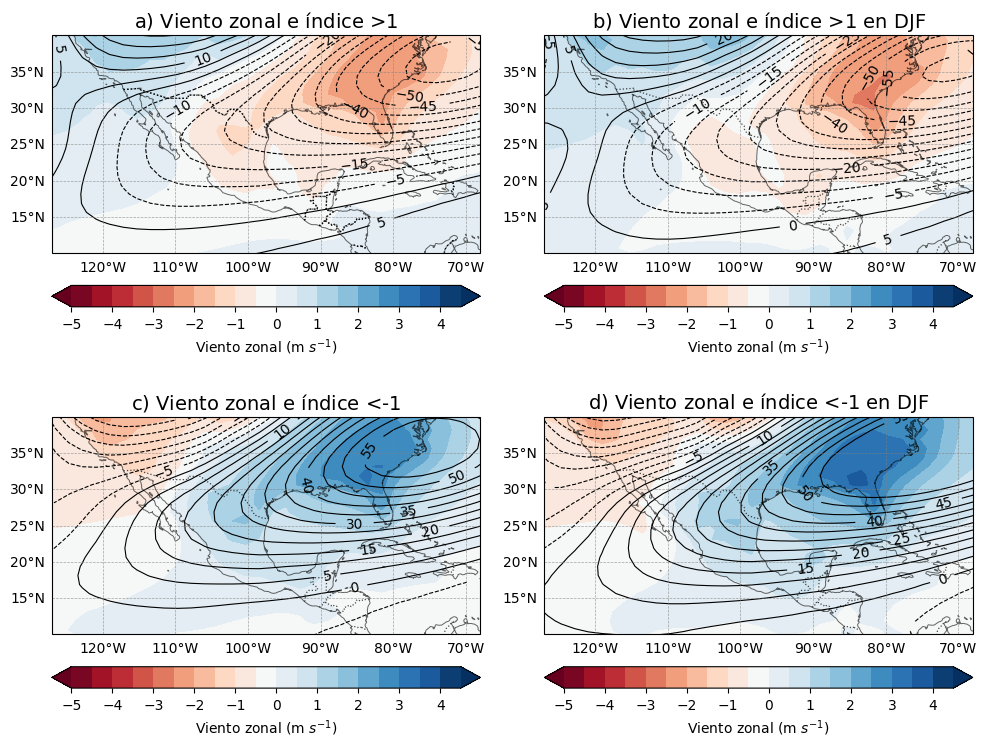

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# Subplot 1: ANUAL INDICE >1
ax = axs[0]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxp_vals.lon,tas_idxp_vals.lat,tas_idxp_vals,levels=np.arange(-5,5,0.5),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.lon,idxp_gph_vals.lat,idxp_gph_vals, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('a$)$ Viento zonal e índice >1', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxn_vals.lon,tas_idxn_vals.lat,tas_idxn_vals,levels=np.arange(-5,5,0.5),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.lon,idxn_gph_vals.lat,idxn_gph_vals, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('c$)$ Viento zonal e índice <-1', fontsize=14)

# Subplot 3: Viento zonal promedio durante eventos CAO - ERA-5
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxp_DJF.lon,tas_idxp_DJF.lat,tas_idxp_DJF,levels=np.arange(-5,5,0.5),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.lon,idxp_gph_djf.lat,idxp_gph_djf, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento zonal e índice >1 en DJF', fontsize=14)

# Subplot 4: Anomalía de viento zonal en DJF - ERA-5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(tas_idxn_DJF.lon,tas_idxn_DJF.lat,tas_idxn_DJF,levels=np.arange(-5,5,0.5),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.lon,idxn_gph_djf.lat,idxn_gph_djf, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('d$)$ Viento zonal e índice <-1 en DJF', fontsize=14)

# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Viento zonal a 200 hPa e índice PNA', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

plt.savefig('tempyPNA_HG')